<a href="https://colab.research.google.com/github/Datascience67/Spoon-Knife/blob/master/Hepatitis_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np





In [2]:
!pip install pycaret --quiet

     |████████████████████████████████| 194kB 5.3MB/s 
     |████████████████████████████████| 3.2MB 18.8MB/s 
     |████████████████████████████████| 266kB 50.1MB/s 
     |████████████████████████████████| 1.2MB 36.3MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 102kB 10.2MB/s 
     |████████████████████████████████| 63.9MB 56kB/s 
     |████████████████████████████████| 7.0MB 47.4MB/s 
     |████████████████████████████████| 133kB 53.0MB/s 
     |████████████████████████████████| 1.6MB 38.0MB/s 
     |████████████████████████████████| 389kB 47.2MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 6.3MB 42.9MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 235kB 37.9MB/s 
     |████████████████████████████████| 2.1MB 40.2MB/s 
     |████████████████████████████████| 604kB 47.2MB/s 
  

In [8]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode activated.


In [11]:
from pycaret.datasets import get_data
dataset = get_data('hepatitis')

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [13]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (146, 20)
Unseen Data For Predictions: (8, 20)


In [14]:
from pycaret.classification import *

In [19]:
exp_clf101 = setup(data = data, target = 'Class', session_id=123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(146, 20)"
4,Missing Values,True
5,Numeric Features,6
6,Categorical Features,13
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [21]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.841800,0.745100,0.300000,0.550000,0.383300,0.319800
1,Extra Trees Classifier,0.833600,0.837200,0.300000,0.450000,0.350000,0.286000
2,Random Forest Classifier,0.823600,0.728100,0.150000,0.250000,0.183300,0.149500
3,Extreme Gradient Boosting,0.822700,0.742400,0.400000,0.550000,0.450000,0.358700
4,CatBoost Classifier,0.822700,0.752800,0.350000,0.400000,0.350000,0.279500
5,Linear Discriminant Analysis,0.821800,0.750700,0.500000,0.600000,0.520000,0.413100
6,Light Gradient Boosting Machine,0.821800,0.742400,0.300000,0.416700,0.330000,0.256700
7,Quadratic Discriminant Analysis,0.813600,0.500000,0.000000,0.000000,0.000000,0.000000
8,Ridge Classifier,0.802700,0.000000,0.300000,0.433300,0.340000,0.246500
9,Ada Boost Classifier,0.793600,0.752100,0.250000,0.383300,0.290000,0.205500


In [22]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9091,0.8333,0.5000,1.0000,0.6667,0.6207
1,0.9091,0.9444,0.5000,1.0000,0.6667,0.6207
2,0.8000,0.1111,0.0000,0.0000,0.0000,-0.1111
3,0.7000,0.7500,0.0000,0.0000,0.0000,-0.1538
4,0.9000,1.0000,0.5000,1.0000,0.6667,0.6154
5,0.9000,0.5000,0.5000,1.0000,0.6667,0.6154
6,0.8000,0.6875,0.0000,0.0000,0.0000,0.0000
7,0.8000,0.8750,0.5000,0.5000,0.5000,0.3750
8,0.8000,0.7500,0.0000,0.0000,0.0000,0.0000
9,0.9000,1.0000,0.5000,1.0000,0.6667,0.6154


In [23]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [24]:
tuned_lr = tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9091,0.8333,0.5000,1.0000,0.6667,0.6207
1,0.9091,1.0000,0.5000,1.0000,0.6667,0.6207
2,0.8000,0.1111,0.0000,0.0000,0.0000,-0.1111
3,0.6000,0.7500,0.0000,0.0000,0.0000,-0.2500
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.5000,0.5000,1.0000,0.6667,0.6154
6,0.7000,0.6875,0.0000,0.0000,0.0000,-0.1538
7,0.8000,0.8750,0.5000,0.5000,0.5000,0.3750
8,0.8000,0.7500,0.0000,0.0000,0.0000,0.0000
9,0.9000,1.0000,0.5000,1.0000,0.6667,0.6154


In [25]:
print(tuned_lr)

LogisticRegression(C=1.94, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


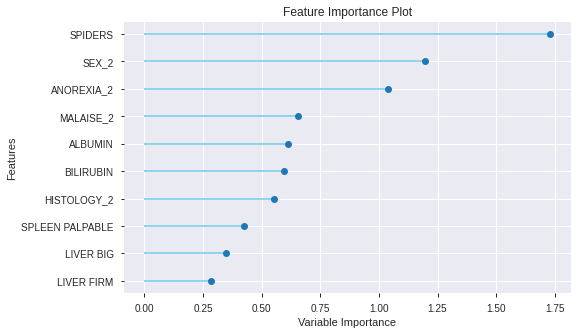

In [26]:
plot_model(tuned_lr, plot='feature')

In [27]:
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.9091,0.934,0.5,1.0,0.6667,0.6207


In [29]:
final_lr = finalize_model(tuned_lr)

In [30]:
print(final_lr)

LogisticRegression(C=1.94, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [32]:
unseen_predictions = predict_model(final_lr, data=data_unseen)
unseen_predictions.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Label,Score
0,0,22,2,2.0,1,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.9,48.0,20.0,4.2,64.0,1,0,0.0041
1,1,39,1,1.0,1,1,1,2,2.0,1.0,2.0,2.0,2.0,2.0,2.3,280.0,98.0,3.8,40.0,1,0,0.0756
2,0,27,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.8,NaN,38.0,4.2,NaN,1,0,0.0148
3,1,38,1,1.0,2,1,1,1,2.0,1.0,2.0,1.0,1.0,1.0,1.2,118.0,16.0,2.8,NaN,2,0,0.4066
4,1,47,1,2.0,2,1,1,2,2.0,1.0,2.0,2.0,1.0,1.0,1.7,86.0,20.0,2.1,46.0,2,0,0.4992


In [33]:
print(unseen_predictions)

   Class  AGE  SEX  STEROID  ...  PROTIME  HISTOLOGY  Label   Score
0      0   22    2      2.0  ...     64.0          1      0  0.0041
1      1   39    1      1.0  ...     40.0          1      0  0.0756
2      0   27    1      2.0  ...      NaN          1      0  0.0148
3      1   38    1      1.0  ...      NaN          2      0  0.4066
4      1   47    1      2.0  ...     46.0          2      0  0.4992
5      0   54    1      1.0  ...     67.0          2      0  0.0121
6      1   70    1      1.0  ...     35.0          2      0  0.3127
7      1   43    1      2.0  ...     42.0          2      1  0.7259

[8 rows x 22 columns]


In [34]:
save_model(final_lr,'Final lr Model 27June2020')

Transformation Pipeline and Model Succesfully Saved


In [35]:
saved_final_lr = load_model('Final lr Model 27June2020')

Transformation Pipeline and Model Sucessfully Loaded


In [36]:
new_prediction = predict_model(saved_final_lr, data=data_unseen)

In [37]:
new_prediction.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Label,Score
0,0,22,2,2.0,1,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.9,48.0,20.0,4.2,64.0,1,0,0.0041
1,1,39,1,1.0,1,1,1,2,2.0,1.0,2.0,2.0,2.0,2.0,2.3,280.0,98.0,3.8,40.0,1,0,0.0756
2,0,27,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.8,NaN,38.0,4.2,NaN,1,0,0.0148
3,1,38,1,1.0,2,1,1,1,2.0,1.0,2.0,1.0,1.0,1.0,1.2,118.0,16.0,2.8,NaN,2,0,0.4066
4,1,47,1,2.0,2,1,1,2,2.0,1.0,2.0,2.0,1.0,1.0,1.7,86.0,20.0,2.1,46.0,2,0,0.4992
